In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-pokemon-game/move-data.csv
/kaggle/input/competitive-pokemon-game/pokemon-data.csv
/kaggle/input/pokemon-stats-data/pokemon-stats.csv
/kaggle/input/pokemon-stats-data/pokemon.csv


# VIDEO GAME ANALYSIS ON POKEMON DATASET
This is a project on pokemon dataset and we are trying to find hints on forming the best pokemon team based on the primary standards and using this and competitive game data for building an ideal team with necessary types and attacks as the standard is all the pokemon is set in lvl 50 for competitive gaming

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *

In [3]:
dataset=pd.read_csv("/kaggle/input/pokemon-stats-data/pokemon.csv")
stat=pd.read_csv("/kaggle/input/pokemon-stats-data/pokemon-stats.csv")

dataset.rename(columns={"#":"pokedex_number"},inplace=True)
poke_dataset=pd.merge(dataset,stat,on="pokedex_number",how="inner")
poke_dataset.drop(columns=["type1","type2","name","japanese_name"],inplace=True)
poke_dataset.rename(columns={"Sp.Atk":"SPatk","Sp.Def":"SPdef"})
poke_dataset


,pokedex_number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,1059860,0.7,45,88.1,65,65,45,6.9,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,...,1059860,1.0,60,88.1,80,80,60,13.0,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,...,1059860,2.0,80,88.1,122,120,80,100.0,1,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,...,1059860,0.6,39,88.1,60,50,65,8.5,1,0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,...,1059860,1.1,58,88.1,80,65,80,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,...,1250000,3.8,83,NaN,173,71,83,100.0,7,1
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,...,1250000,9.2,97,NaN,107,101,61,999.9,7,1
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,...,1250000,0.3,59,NaN,59,31,109,0.1,7,1
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,...,1250000,5.5,223,NaN,97,53,43,888.0,7,1


# BASIC EDA TO IDENTIFY THE MAXIMIUM STAT POKEMONS AND MINIMUM STAT POKEMON 
It is done to see whether any base pokemon can be added to the list

In [4]:
min_hp_pokemon = poke_dataset.loc[poke_dataset['hp'].idxmin()]
max_hp_pokemon = poke_dataset.loc[poke_dataset['hp'].idxmax()]

min_att_pokemon = poke_dataset.loc[poke_dataset['Attack'].idxmin()]
max_att_pokemon = poke_dataset.loc[poke_dataset['Attack'].idxmax()]

min_def_pokemon = poke_dataset.loc[poke_dataset['Defense'].idxmin()]
max_def_pokemon = poke_dataset.loc[poke_dataset['Defense'].idxmax()]

min_speed_pokemon = poke_dataset.loc[poke_dataset['Speed'].idxmin()]
max_speed_pokemon = poke_dataset.loc[poke_dataset['Speed'].idxmax()]


# PRINTING THE VALUES

In [5]:
print("The pokemons with min hit points")
print(min_hp_pokemon)
print("The pokemons with max hit points")
print(max_hp_pokemon)

print("The pokemons with min attack")
print(min_att_pokemon)
print("The pokemons with max attack")
print(max_att_pokemon)

print("The pokemons with min speed")
print(min_speed_pokemon)
print("The pokemons with max speed")
print(max_speed_pokemon)

print("The pokemons with min attack")
print(min_att_pokemon)
print("The pokemons with max attack")
print(max_att_pokemon)

The pokemons with min hit points
pokedex_number                    292
Name                          Cascoon
Type 1                            Bug
Type 2                            NaN
HP                                 50
Attack                             35
Defense                            55
Sp. Atk                            25
Sp. Def                            25
Speed                              15
Generation                          3
Legendary                       False
abilities            ['Wonder Guard']
against_bug                       0.5
against_dark                      2.0
against_dragon                    1.0
against_electric                  1.0
against_fairy                     1.0
against_fight                     0.0
against_fire                      2.0
against_flying                    2.0
against_ghost                     2.0
against_grass                     0.5
against_ground                    0.5
against_ice                       1.0
against_normal   

# ABILITY AND TYPE MATCHUPS
This is a very cruical step as even though you many have a type advantage you may face abilities that are kind of pain in the ass and they are game changers that will litreally make a weak pokemon into a one hit legendary killer pokmeon when exploited. You can loose miserably even with an array of legendary pokemons in your teams and I have personal experience on it

In [6]:
uniq_abi=stat["abilities"].unique()
uniq_abi

array(["['Overgrow', 'Chlorophyll']", "['Blaze', 'Solar Power']",
       "['Torrent', 'Rain Dish']", "['Shield Dust', 'Run Away']",
       "['Shed Skin']", "['Compoundeyes', 'Tinted Lens']",
       "['Swarm', 'Sniper']", "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']",
       "['Keen Eye', 'Sniper']", "['Intimidate', 'Shed Skin', 'Unnerve']",
       "['Static', 'Lightningrod']",
       "['Static', 'Lightningrod', 'Surge Surfer']",
       "['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slush Rush']",
       "['Poison Point', 'Rivalry', 'Hustle']",
       "['Poison Point', 'Rivalry', 'Sheer Force']",
       "['Cute Charm', 'Magic Guard', 'Friend Guard']",
       "['Cute Charm', 'Magic Guard', 'Unaware']",
       "['Flash Fire', 'Drought', 'Snow Cloak', 'Snow Warning']",
       "['Cute Charm', 'Competitive', 'Friend Guard']",
       "['Cute Charm', 'Competitive', 'Frisk']",
       "['Inner Focus', 'Infiltrator']", "['Chlor

# POKEMON EFFECTIVENESS ANALYSIS
The objective of this EDA is to find the number of effective types that are there for the primary 18 types 
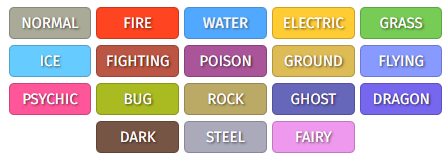

The Scale is 0,0.5,1,2 from least to super effective and count plot is made using that for all the types

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


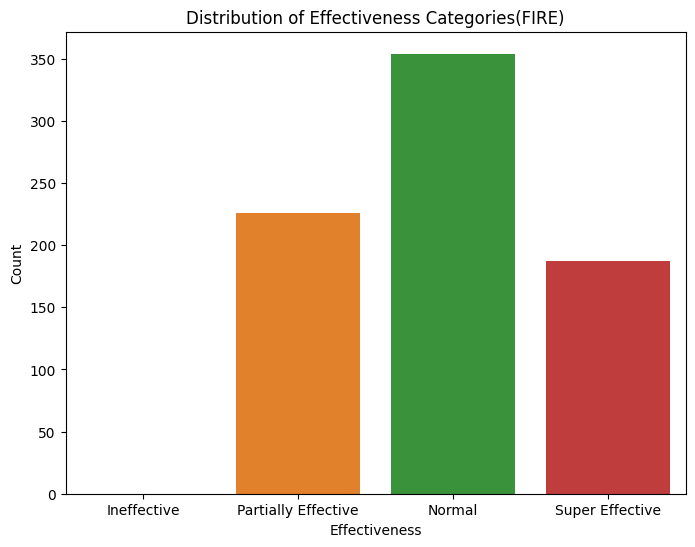

In [7]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_fire']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)
    
# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(FIRE)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


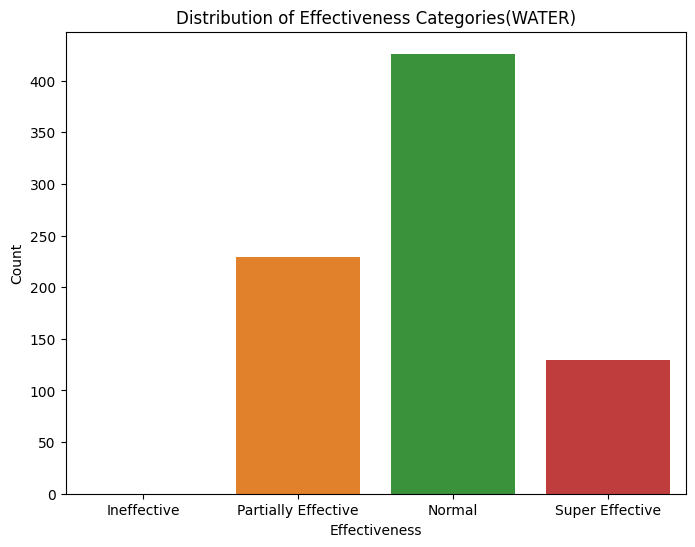

In [8]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_water']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)
    
# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(WATER)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


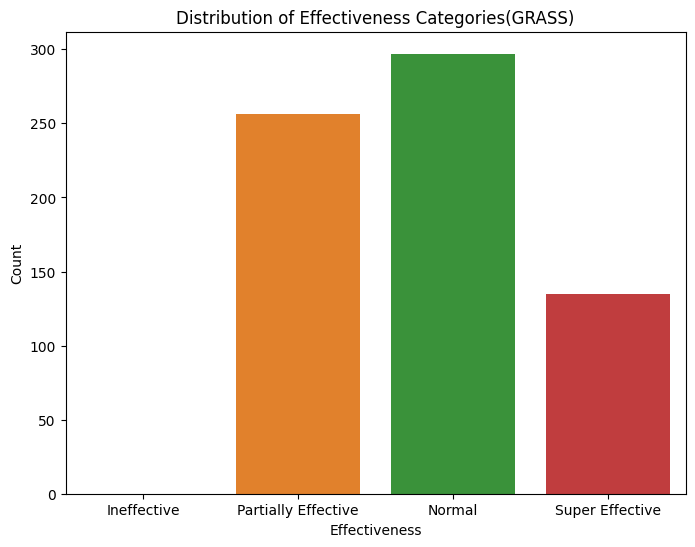

In [9]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_grass']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)
    
# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(GRASS)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


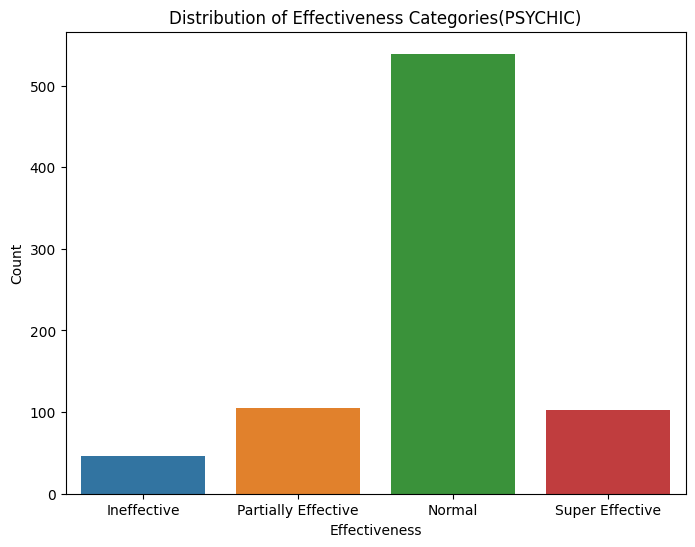

In [10]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_psychic']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(PSYCHIC)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


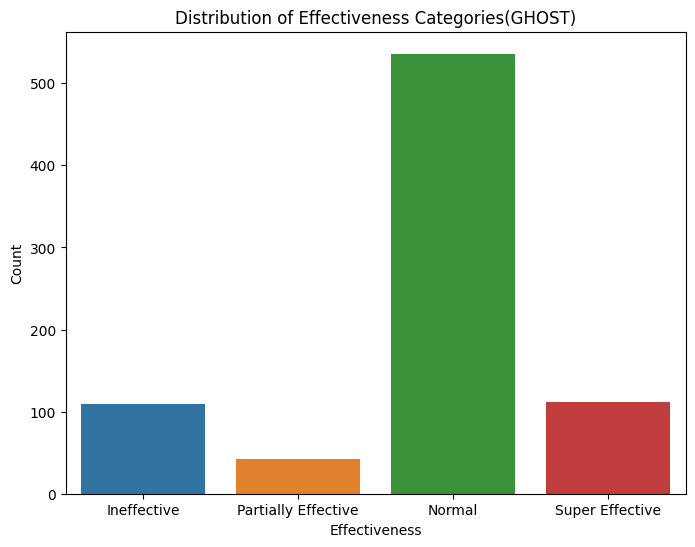

In [11]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_ghost']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(GHOST)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


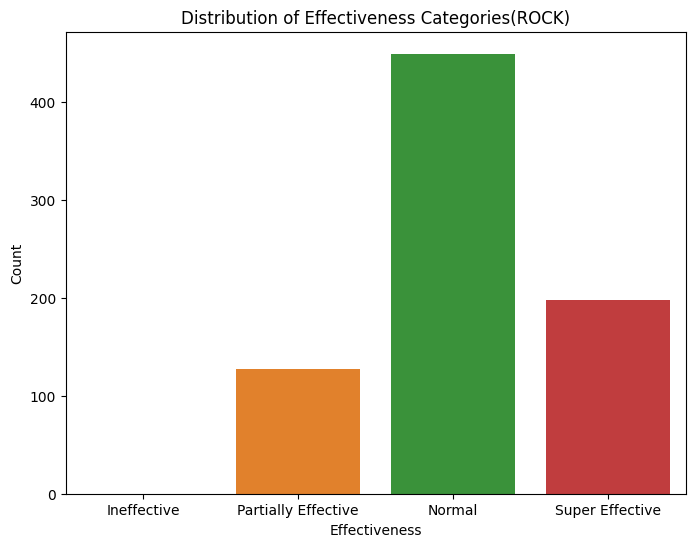

In [12]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_rock']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(ROCK)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


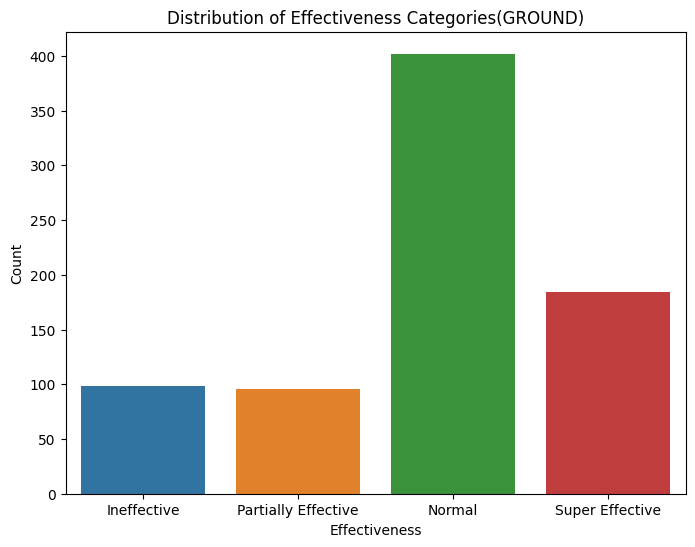

In [13]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_ground']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(GROUND)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


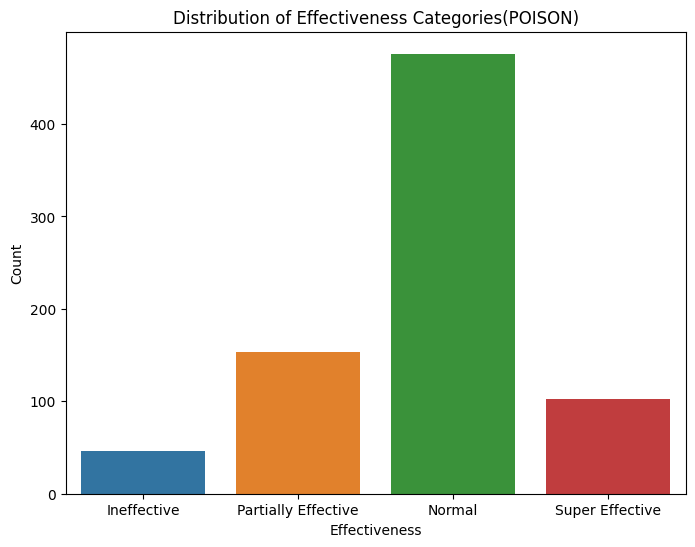

In [14]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_poison']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(POISON)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


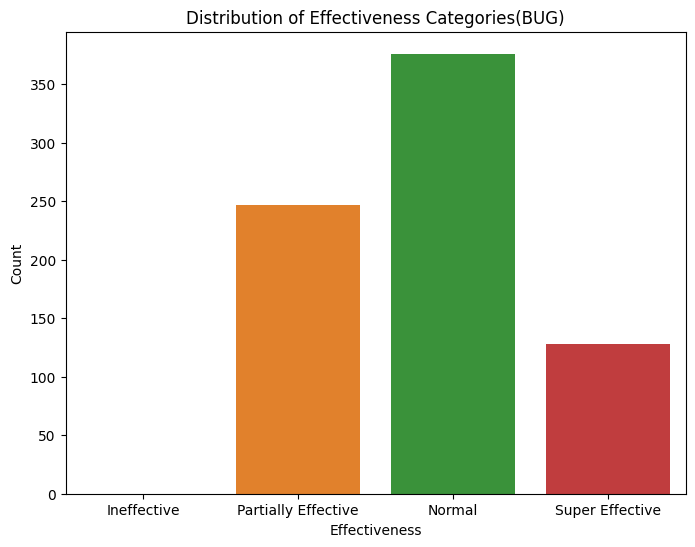

In [15]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_bug']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(BUG)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


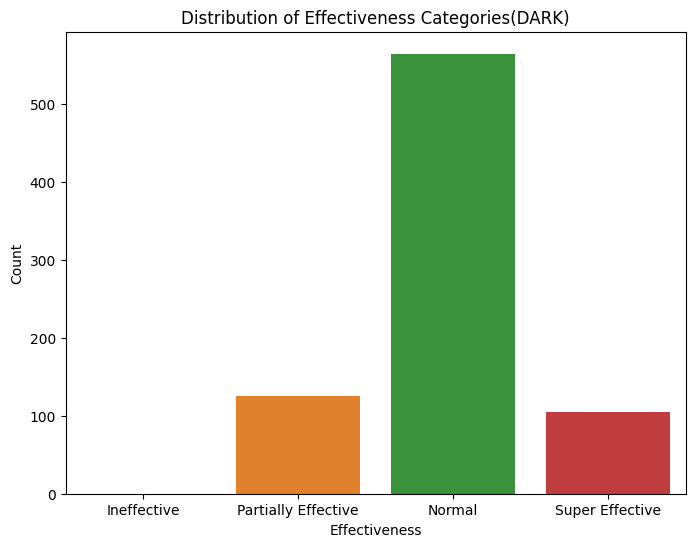

In [16]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_dark']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(DARK)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


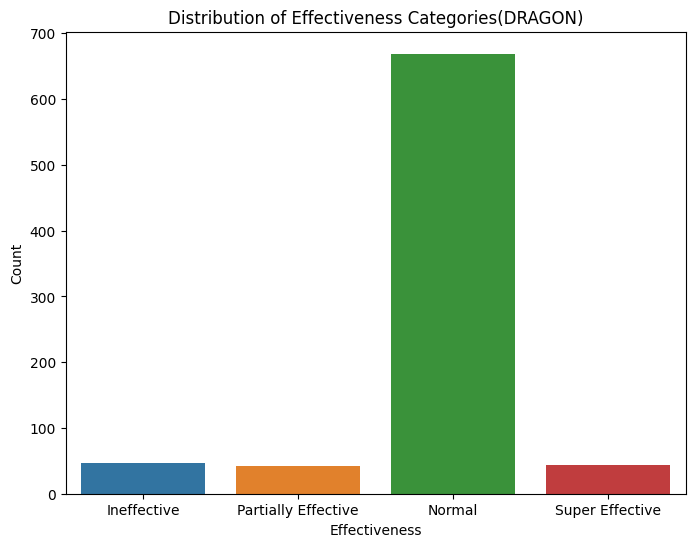

In [17]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_dragon']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(DRAGON)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


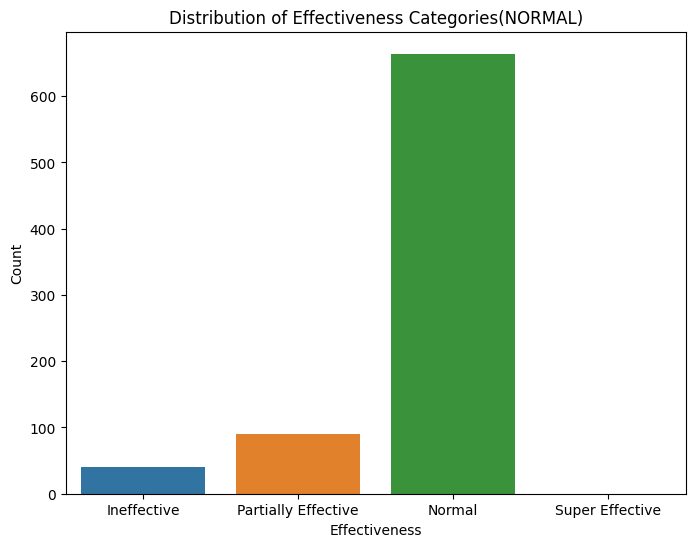

In [18]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_normal']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(NORMAL)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


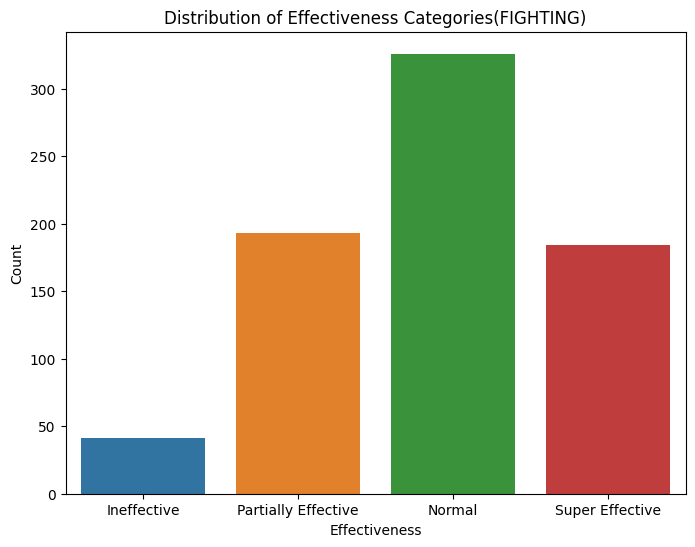

In [19]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_fight']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(FIGHTING)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


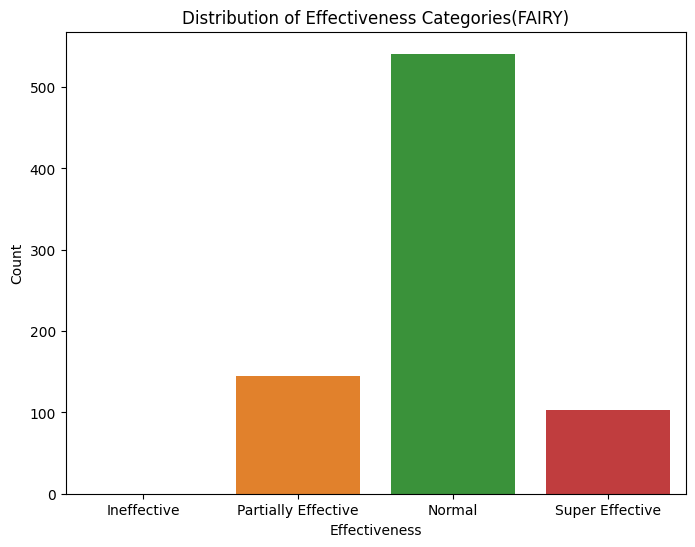

In [20]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_fairy']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(FAIRY)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


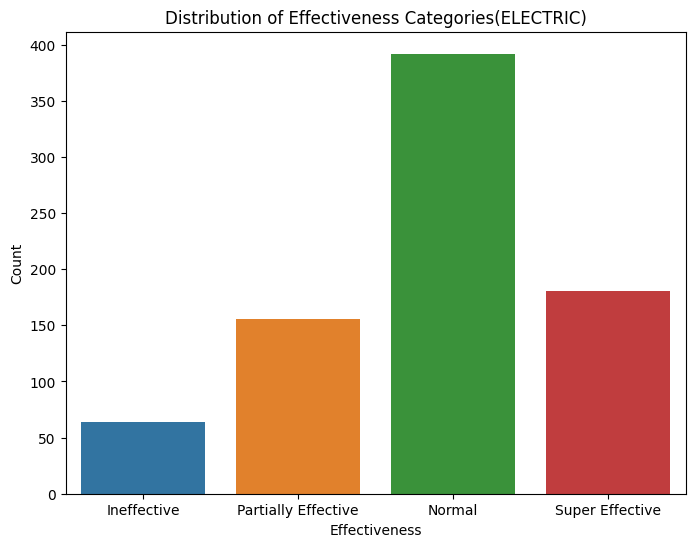

In [21]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_electric']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(ELECTRIC)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


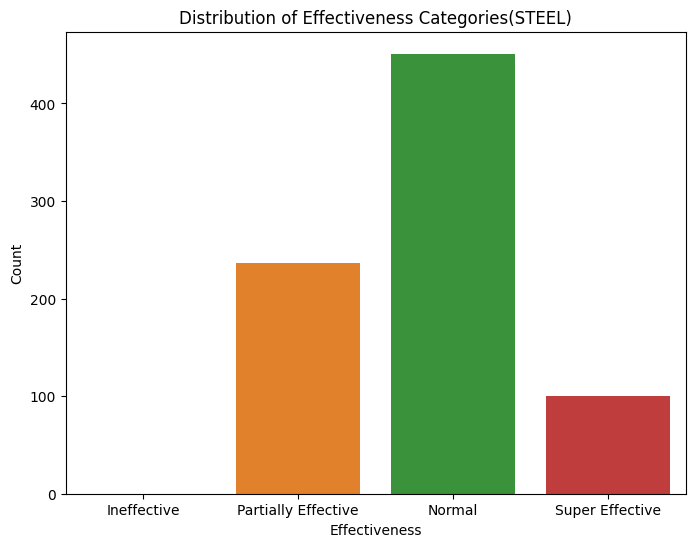

In [22]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_steel']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(STEEL)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


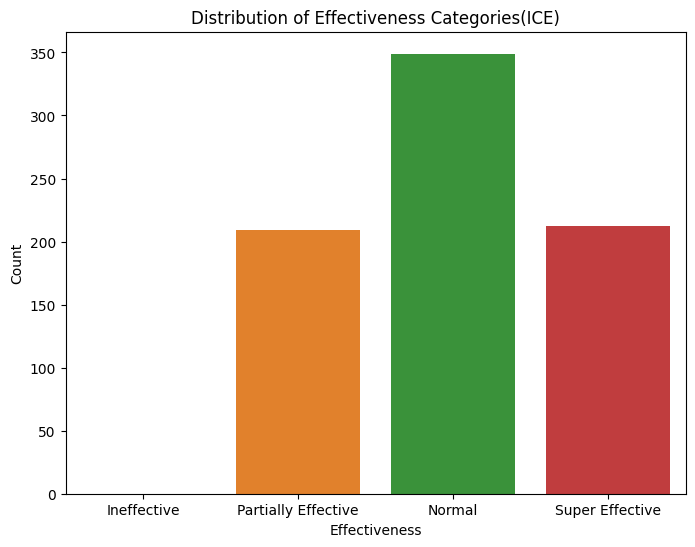

In [23]:
# Effectiveness categories
effectiveness_categories = {
    0: 'Ineffective',
    0.5: 'Partially Effective',
    1: 'Normal',
    2: 'Super Effective'
}

# Initialize dictionaries to store effectiveness counts
ineffective_count = 0
partially_effective_count = 0
normal_count = 0
super_effective_count = 0

for ability in uniq_abi:
    # Filter the DataFrame for rows where the ability matches
    ability_data = stat.loc[stat['abilities'] == ability, 'against_ice']
    
    # Count occurrences of each effectiveness category
    category_counts = ability_data.map(effectiveness_categories).value_counts()
    
    # Increment the counts for each effectiveness category
    ineffective_count += category_counts.get('Ineffective', 0)
    partially_effective_count += category_counts.get('Partially Effective', 0)
    normal_count += category_counts.get('Normal', 0)
    super_effective_count += category_counts.get('Super Effective', 0)

# Plotting
effectiveness_labels = ['Ineffective', 'Partially Effective', 'Normal', 'Super Effective']
effectiveness_counts = [ineffective_count, partially_effective_count, normal_count, super_effective_count]

plt.figure(figsize=(8, 6))
sns.barplot(x=effectiveness_labels, y=effectiveness_counts)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness Categories(ICE)')
plt.show()

# FINDING THE TOP 10 POKEMON WITH VERY GOOD BASE STATS
The base stat is hp+attack+defense+special_attack+special_defense and their types and their base totals also making them really power full pokemons as said earlier the types and their abilities also make significant differences so it is better to see all that status also and some leagues may allow only one legendary pokemon.

In [24]:
# Specify the columns to include
columns_to_include = ['name','abilities', 'type1', 'type2', 'is_legendary', 'generation', 'total']

# Specify the columns to sum up
columns_to_sum = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Sum up the specified columns for each Pokémon
stat['total'] = stat[columns_to_sum].sum(axis=1)

# Sort the DataFrame based on the total values
top_10 = stat.sort_values(by='total', ascending=False).head(10)

# Print the top 10 values along with additional columns
print(top_10[columns_to_include])


          name                          abilities    type1    type2  \
149     Mewtwo            ['Pressure', 'Unnerve']  psychic      NaN   
383   Rayquaza                       ['Air Lock']   dragon   flying   
382    Groudon                        ['Drought']   ground      NaN   
381     Kyogre                        ['Drizzle']    water      NaN   
492     Arceus                      ['Multitype']   normal      NaN   
717    Zygarde  ['Aura Break', 'Power Construct']   dragon   ground   
380     Latios                       ['Levitate']   dragon  psychic   
372  Salamence            ['Intimidate', 'Moxie']   dragon   flying   
247  Tyranitar         ['Sand Stream', 'Unnerve']     rock     dark   
444   Garchomp        ['Sand Veil', 'Rough Skin']   dragon   ground   

     is_legendary  generation  total  
149             1           1    780  
383             1           3    780  
382             1           3    770  
381             1           3    770  
492             1      

In [25]:
# Load Pokémon dataset
pokemon_data = pd.read_csv("/kaggle/input/competitive-pokemon-game/pokemon-data.csv",delimiter=";")

# Load moves dataset
moves_data = pd.read_csv('/kaggle/input/competitive-pokemon-game/move-data.csv')

# Explode the "Moves" column in the Pokémon dataset
pokemon_data_exploded = pokemon_data.explode('Moves')

# Merge the exploded Pokémon dataset with the moves dataset based on move names
combined_data = pokemon_data_exploded.merge(moves_data, left_on='Moves', right_on='Name', how='left')

# Display the combined dataset
print(combined_data.head(1))

      Name_x             Types                       Abilities Tier  HP  \
0  Abomasnow  ['Grass', 'Ice']  ['Snow Warning', 'Soundproof']   PU  90   

   Attack  Defense  Special Attack  Special Defense  Speed  ...  \
0      92       75              92               85     60  ...   

                                               Moves Index  Name_y Type  \
0  ['Ice Punch', 'Powder Snow', 'Leer', 'Razor Le...   NaN     NaN  NaN   

  Category Contest  PP  Power  Accuracy  Generation  
0      NaN     NaN NaN    NaN       NaN         NaN  

[1 rows x 21 columns]
